In [1]:
import numpy as np 
import pandas as pd 
import re

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
import pickle

'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


"\npd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)\npd.set_option('display.width', 1000)\npd.set_option('display.float_format', '{:,.5f}'.format)\n"

In [2]:
#Notes
# Decrease Latitude, You go down
# Decrease Longitude, You go left


# Load Data

In [45]:
df= pickle.load(open('data/ml_dataset_v4.pkl', "rb"))
#df= pickle.load(open('data/pca_dataset.pkl', "rb"))
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
#df0=df
df.reset_index(inplace=True)

df

,index,price,nearest_airport,ave_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,...,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,year_2019,year_2020,year_2021,year_2022
0,1,-0.571021,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,0,1,0,0,0,0,0,1
1,3,-1.197629,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,1,0,0,0,0,0,0,1
2,4,-0.571021,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,1,0,0,0,0,0,0,1
3,5,0.162917,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,1,0,0,0,0,0,0,0,1
4,7,0.162917,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51615,76495,0.364290,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,0,0,0,1
51616,76510,0.780325,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,1,0,0,0
51617,76511,0.513531,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,0,1,0,0
51618,76515,0.513531,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,1,0,0,0


# Column Aggregation PCA

In [46]:
df_pca=df.dropna()
df_pca=df_pca.drop('is_good_stay', axis=1)
#df_pca.drop(columns=["height_m","weight_kg","base_total"],inplace=True)
df_pca

,index,price,nearest_airport,ave_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,...,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,year_2019,year_2020,year_2021,year_2022
0,1,-0.571021,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,0,1,0,0,0,0,0,1
1,3,-1.197629,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,1,0,0,0,0,0,0,1
2,4,-0.571021,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,1,0,0,0,0,0,0,1
3,5,0.162917,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,1,0,0,0,0,0,0,0,1
4,7,0.162917,0.077783,-0.046294,-0.14848,0.735856,0.137231,-0.156006,0.696076,-0.542293,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51615,76495,0.364290,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,0,0,0,1
51616,76510,0.780325,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,1,0,0,0
51617,76511,0.513531,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,0,1,0,0
51618,76515,0.513531,1.701044,1.588901,-0.27143,-0.962264,0.551809,-0.121331,0.696076,-0.829630,...,0,0,0,0,0,0,1,0,0,0


In [24]:
# Get Features
X = df_pca

# Standardize Dataset
# for col in X.columns:
#     X[col] = StandardScaler().fit_transform(X[col].values.reshape(-1, 1))

# Create PCA
pca = PCA(n_components=X.shape[1])

# Fit Transform the Dataset
pca_X = pd.DataFrame(pca.fit_transform(X))

pca_X.head()

,0,1,2,3,4,5,6,7,8,9,...,347,348,349,350,351,352,353,354,355,356
0,-0.565056,2.568058,0.754963,-1.272974,-0.603032,-1.054868,-0.766930,1.008513,-0.802978,-0.194560,...,-4.471452e-15,5.707841e-15,-1.673577e-15,7.130091e-16,7.502305e-15,-1.369579e-15,-3.066744e-15,-5.022570e-16,-3.810408e-15,1.341051e-15
1,3.422769,3.172104,1.291743,-1.268989,-0.672091,-0.921737,-0.583670,0.929564,-0.860947,-0.014839,...,4.193820e-15,-3.224714e-15,1.405224e-15,-4.068547e-15,-7.337402e-16,-1.963085e-16,-3.342103e-15,-4.165781e-16,5.275600e-15,-3.988624e-16
2,-1.513149,2.430933,0.638080,-1.275468,-0.594699,-1.033154,-0.723571,0.953320,-0.800860,-0.167705,...,-8.388090e-15,2.129104e-15,1.254750e-15,-1.566725e-15,-6.797712e-16,-1.187137e-15,4.518648e-15,-6.687331e-17,-7.774576e-16,-1.532581e-15
3,2.415944,2.576972,1.039906,-1.250224,-0.388176,-1.101361,-0.743228,1.080158,-0.966087,-0.171724,...,-4.133418e-15,-5.498478e-15,1.183887e-14,1.694169e-15,-1.880220e-15,-8.691929e-16,-2.519275e-15,-6.602314e-18,1.436808e-15,-3.181720e-15
4,-0.541167,2.294605,0.679314,-1.263469,-0.428069,-1.119800,-0.792968,1.030143,-0.881907,-0.191568,...,-3.063711e-15,-1.901474e-15,5.572618e-15,-2.693325e-15,-1.217644e-15,-4.807009e-15,9.201224e-15,-1.699661e-16,2.078328e-15,4.624265e-15


In [37]:
pca_X

,0,1,2,3,4,5,6,7,8,9,...,347,348,349,350,351,352,353,354,355,356
0,-0.565056,2.568058,0.754963,-1.272974,-0.603032,-1.054868,-0.766930,1.008513,-0.802978,-0.194560,...,-4.471452e-15,5.707841e-15,-1.673577e-15,7.130091e-16,7.502305e-15,-1.369579e-15,-3.066744e-15,-5.022570e-16,-3.810408e-15,1.341051e-15
1,3.422769,3.172104,1.291743,-1.268989,-0.672091,-0.921737,-0.583670,0.929564,-0.860947,-0.014839,...,4.193820e-15,-3.224714e-15,1.405224e-15,-4.068547e-15,-7.337402e-16,-1.963085e-16,-3.342103e-15,-4.165781e-16,5.275600e-15,-3.988624e-16
2,-1.513149,2.430933,0.638080,-1.275468,-0.594699,-1.033154,-0.723571,0.953320,-0.800860,-0.167705,...,-8.388090e-15,2.129104e-15,1.254750e-15,-1.566725e-15,-6.797712e-16,-1.187137e-15,4.518648e-15,-6.687331e-17,-7.774576e-16,-1.532581e-15
3,2.415944,2.576972,1.039906,-1.250224,-0.388176,-1.101361,-0.743228,1.080158,-0.966087,-0.171724,...,-4.133418e-15,-5.498478e-15,1.183887e-14,1.694169e-15,-1.880220e-15,-8.691929e-16,-2.519275e-15,-6.602314e-18,1.436808e-15,-3.181720e-15
4,-0.541167,2.294605,0.679314,-1.263469,-0.428069,-1.119800,-0.792968,1.030143,-0.881907,-0.191568,...,-3.063711e-15,-1.901474e-15,5.572618e-15,-2.693325e-15,-1.217644e-15,-4.807009e-15,9.201224e-15,-1.699661e-16,2.078328e-15,4.624265e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51615,-1.258188,-2.240894,2.109766,0.759040,-0.722630,0.112695,-0.616292,-0.558362,0.671608,0.504768,...,1.823470e-17,2.671020e-17,3.285849e-17,5.176459e-17,1.087451e-17,3.759635e-17,3.244278e-17,1.303897e-17,-5.228292e-17,-1.457766e-17
51616,-1.223813,-2.382486,2.027953,0.829569,-0.546056,-0.014869,-0.639154,-0.621667,0.733050,0.617465,...,-8.659692e-19,-3.360576e-17,8.130645e-18,3.297774e-17,1.242627e-17,4.099469e-17,-9.314870e-18,1.840537e-17,-4.208108e-17,5.346332e-18
51617,-1.278957,-2.214387,2.040758,0.833260,-0.610810,-0.047639,-0.697106,-0.607486,0.780515,0.608195,...,-2.054414e-17,1.371974e-17,8.567701e-18,7.852213e-17,-3.340702e-17,4.144621e-17,2.328126e-17,6.983143e-18,-2.332035e-17,-1.355527e-17
51618,1.714066,-1.968125,2.414378,0.831125,-0.558079,0.019997,-0.591173,-0.607579,0.666386,0.661310,...,2.252679e-17,1.703561e-17,-4.551089e-17,9.472546e-18,3.267960e-17,-1.370406e-17,-2.659130e-17,-4.811348e-18,3.104836e-17,3.993375e-18


In [25]:
pd.set_option('display.max_rows', 50)
cumsum_pca = pca.explained_variance_ratio_.cumsum()
component_matrix = pd.DataFrame(pca.components_, columns=X.columns, index=[f'pca_{i}' for i in range(len(cumsum_pca))]).T
component_matrix

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_347,pca_348,pca_349,pca_350,pca_351,pca_352,pca_353,pca_354,pca_355,pca_356
price,0.032793,-0.373187,-0.088018,0.010208,0.230883,-0.085716,-0.043100,0.055690,-0.128342,-0.041098,...,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
nearest_airport,-0.022184,-0.171838,0.404269,0.117035,0.024252,0.004438,-0.260068,-0.046431,0.283478,-0.207527,...,2.869110e-17,-1.091441e-16,-4.964118e-17,-1.546948e-17,9.121343e-18,-1.179318e-16,-6.336712e-17,-8.388252e-17,-2.156927e-16,-6.418477e-17
ave_airport,-0.025552,-0.171052,0.419984,-0.062311,0.124261,0.120994,-0.137400,-0.135340,0.321071,-0.004324,...,-2.902326e-17,1.294605e-16,3.890378e-17,3.736927e-17,-2.688494e-17,1.269980e-16,5.619531e-17,8.484158e-17,2.879762e-17,6.361855e-17
nearest_resto,-0.022131,0.072768,0.066941,0.071805,0.201464,0.203912,0.202209,0.786599,0.349924,0.140415,...,-1.761151e-17,1.689242e-17,2.203397e-17,2.171148e-17,-2.682915e-18,-1.865170e-17,-1.636826e-17,-1.492214e-17,3.492495e-17,-6.495727e-18
nearest_train,0.006825,-0.039795,-0.095722,-0.525475,0.202377,0.031330,0.420480,0.070443,-0.121285,-0.312941,...,1.497728e-17,-3.041103e-17,-2.074860e-18,-3.417872e-17,5.329822e-18,-4.438236e-18,-4.055954e-17,-2.201117e-17,-1.062619e-16,-5.246261e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
month_name_September,0.002523,-0.001430,0.006118,-0.000400,-0.003079,0.001658,0.001558,0.009926,-0.005318,-0.014340,...,2.055781e-02,-5.601167e-02,5.039635e-02,-9.890561e-02,9.394292e-02,-1.137611e-01,5.625261e-03,-7.291592e-04,4.791683e-02,-4.499931e-03
year_2019,-0.003992,-0.003890,-0.008085,0.001085,0.006343,-0.002767,0.003526,-0.016250,0.017530,0.024174,...,4.568140e-02,-2.326013e-02,5.250644e-03,-3.404084e-03,-1.868064e-02,3.083597e-02,6.405944e-03,2.414017e-03,-1.337770e-01,-8.655909e-02
year_2020,-0.009779,0.002622,-0.022564,0.012045,0.021688,-0.026752,0.010295,-0.039907,0.025937,0.060060,...,4.568140e-02,-2.326013e-02,5.250644e-03,-3.404084e-03,-1.868064e-02,3.083597e-02,6.405944e-03,2.414017e-03,-1.337770e-01,-8.655909e-02
year_2021,0.022366,0.027599,0.006624,0.013059,0.008334,-0.019541,-0.022948,0.004019,-0.006602,0.010078,...,4.568140e-02,-2.326013e-02,5.250644e-03,-3.404084e-03,-1.868064e-02,3.083597e-02,6.405944e-03,2.414017e-03,-1.337770e-01,-8.655909e-02


In [8]:
#component_matrix.to_csv("pca.csv")

In [33]:
display=pd.DataFrame(pca.explained_variance_ratio_.cumsum()).head(4)
display["Diff"]=display[0].diff()
display

,0,Diff
0,0.169167,NaN
1,0.301274,0.132107
2,0.409963,0.108689
3,0.465210,0.055247


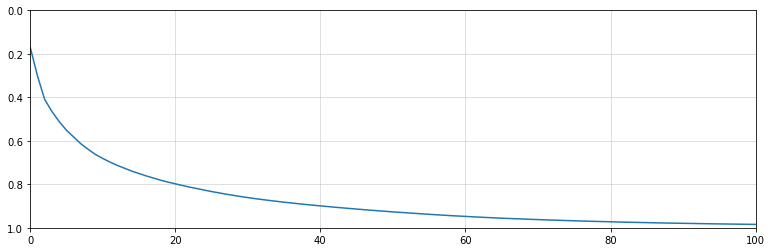

In [34]:
evr = pca.explained_variance_ratio_
cumsum_pca = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(13, 4))
plt.plot([i for i in range(len(cumsum_pca))], cumsum_pca)
plt.grid(True, alpha=0.5)
plt.ylim([1, 0])
plt.xlim([0, 100])
plt.show()

In [43]:
df[["is_good_stay"]]
#pca_X

,is_good_stay
1,0
3,0
4,0
5,0
7,0
...,...
76495,0
76510,1
76511,1
76515,1


In [49]:
#df_compressed=component_matrix.iloc[:,:41]
df_compressed=pd.concat([df[["is_good_stay"]],pca_X],axis=1).iloc[:,:42]
df_compressed

,is_good_stay,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,0,-0.565056,2.568058,0.754963,-1.272974,-0.603032,-1.054868,-0.766930,1.008513,-0.802978,...,-0.092421,-0.760160,-0.633299,-0.130416,-0.109030,-0.403867,0.117733,-0.252251,0.257743,0.194580
1,0,3.422769,3.172104,1.291743,-1.268989,-0.672091,-0.921737,-0.583670,0.929564,-0.860947,...,0.228414,-0.721267,-0.588908,-0.053375,-0.137676,-0.140914,0.093175,-0.325073,0.138453,0.149090
2,0,-1.513149,2.430933,0.638080,-1.275468,-0.594699,-1.033154,-0.723571,0.953320,-0.800860,...,0.057069,-0.638204,-0.665288,-0.311260,-0.005137,-0.252792,-0.012394,-0.246056,0.320277,0.233506
3,0,2.415944,2.576972,1.039906,-1.250224,-0.388176,-1.101361,-0.743228,1.080158,-0.966087,...,-0.025400,-0.826429,-0.599702,-0.217997,-0.064097,-0.510847,0.132027,-0.240617,0.174000,0.143221
4,0,-0.541167,2.294605,0.679314,-1.263469,-0.428069,-1.119800,-0.792968,1.030143,-0.881907,...,-0.062138,-0.805975,-0.623749,-0.297495,-0.062564,-0.509238,0.180188,-0.169093,0.122338,0.223062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51615,0,-1.258188,-2.240894,2.109766,0.759040,-0.722630,0.112695,-0.616292,-0.558362,0.671608,...,-0.024310,-0.106600,-0.070720,0.032072,-0.462705,0.166198,-0.496959,-0.219011,0.283484,-0.142081
51616,1,-1.223813,-2.382486,2.027953,0.829569,-0.546056,-0.014869,-0.639154,-0.621667,0.733050,...,-0.117961,0.100693,-0.045460,0.047740,-0.708693,-0.130498,-0.410914,-0.419112,-0.142487,-0.266481
51617,1,-1.278957,-2.214387,2.040758,0.833260,-0.610810,-0.047639,-0.697106,-0.607486,0.780515,...,-0.442299,-0.024789,-0.196870,-0.113934,-0.683364,-0.018321,-0.319026,-0.288268,0.135847,-0.131709
51618,1,1.714066,-1.968125,2.414378,0.831125,-0.558079,0.019997,-0.591173,-0.607579,0.666386,...,-0.082631,-0.049447,0.198713,1.199236,-0.451423,0.046127,-0.368229,-0.419021,0.005598,-0.211583


In [51]:
pickle.dump(df_compressed, open('data/ml_dataset_v5.pkl', "wb"))